Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [1]:
import pandas as pd
Airlines=pd.read_excel("Airlines+Data.xlsx")
Airlines
     

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<Axes: >

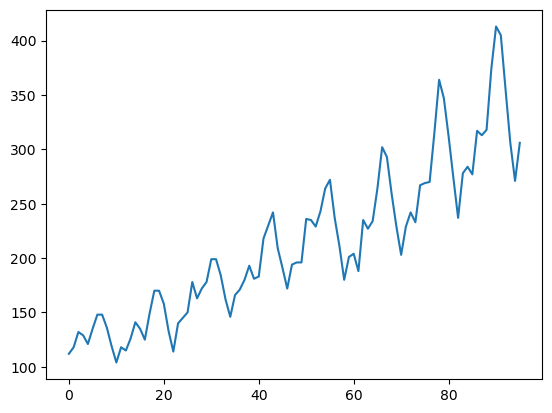

In [2]:
import matplotlib.pyplot as plt
Airlines.Passengers.plot()

In [3]:
# Data preprocessing / Creating Dummy Variables

## Same as encoder
import numpy as np

month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

Airlines['Month'] = pd.to_datetime(Airlines['Month'])

Airlines["Month_Year"] = Airlines['Month'].dt.strftime("%b-%y")

P = Airlines["Month_Year"][0]
P[0:3]

Airlines["Months"] = 0


for i in range(96):
    Airlines.loc[i, 'Months'] = Airlines.loc[i, 'Month_Year'][0:3]

month_dummies = pd.DataFrame(pd.get_dummies(Airlines['Months']))
month_dummies


Airlines1 = pd.concat([Airlines,month_dummies],axis = 1)

Airlines1.rename(columns={"Month": 'Date'}, inplace=True)
Airlines1["Year"] = Airlines1.Date.dt.strftime("%Y") # year extraction
Airlines1

,Date,Passengers,Month_Year,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year
0,1995-01-01,112,Jan-95,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1995
1,1995-02-01,118,Feb-95,Feb,0,0,0,1,0,0,0,0,0,0,0,0,1995
2,1995-03-01,132,Mar-95,Mar,0,0,0,0,0,0,0,1,0,0,0,0,1995
3,1995-04-01,129,Apr-95,Apr,1,0,0,0,0,0,0,0,0,0,0,0,1995
4,1995-05-01,121,May-95,May,0,0,0,0,0,0,0,0,1,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug-02,Aug,0,1,0,0,0,0,0,0,0,0,0,0,2002
92,2002-09-01,355,Sep-02,Sep,0,0,0,0,0,0,0,0,0,0,0,1,2002
93,2002-10-01,306,Oct-02,Oct,0,0,0,0,0,0,0,0,0,0,1,0,2002
94,2002-11-01,271,Nov-02,Nov,0,0,0,0,0,0,0,0,0,1,0,0,2002


In [4]:
import numpy as np
Airlines1["t"]=np.arange(1,97)

Airlines1["t_square"]=np.square(Airlines1["t"])

Airlines1["Log_Passengers"]=np.log(Airlines1["Passengers"])

Airlines1

,Date,Passengers,Month_Year,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year,t,t_square,Log_Passengers
0,1995-01-01,112,Jan-95,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1995,1,1,4.718499
1,1995-02-01,118,Feb-95,Feb,0,0,0,1,0,0,0,0,0,0,0,0,1995,2,4,4.770685
2,1995-03-01,132,Mar-95,Mar,0,0,0,0,0,0,0,1,0,0,0,0,1995,3,9,4.882802
3,1995-04-01,129,Apr-95,Apr,1,0,0,0,0,0,0,0,0,0,0,0,1995,4,16,4.859812
4,1995-05-01,121,May-95,May,0,0,0,0,0,0,0,0,1,0,0,0,1995,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug-02,Aug,0,1,0,0,0,0,0,0,0,0,0,0,2002,92,8464,6.003887
92,2002-09-01,355,Sep-02,Sep,0,0,0,0,0,0,0,0,0,0,0,1,2002,93,8649,5.872118
93,2002-10-01,306,Oct-02,Oct,0,0,0,0,0,0,0,0,0,0,1,0,2002,94,8836,5.723585
94,2002-11-01,271,Nov-02,Nov,0,0,0,0,0,0,0,0,0,1,0,0,2002,95,9025,5.602119


<Axes: >

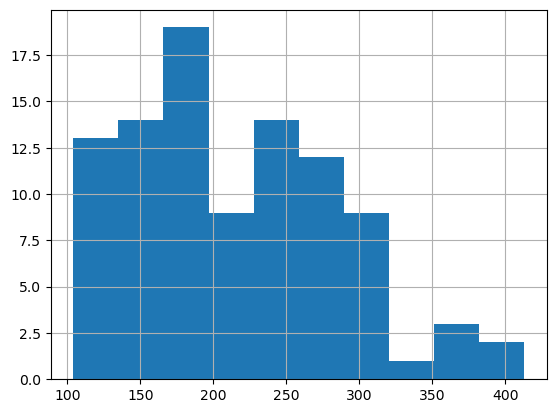

In [5]:
Airlines1.Passengers.hist()

<Axes: xlabel='Months', ylabel='Year'>

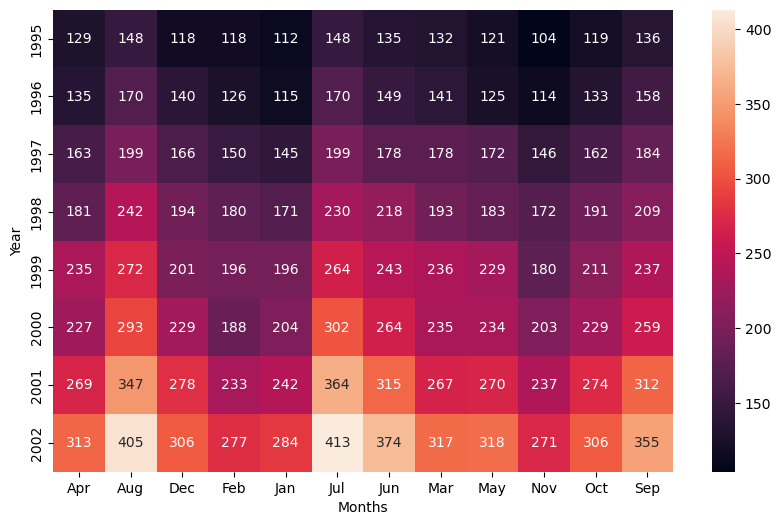

In [6]:
#EDA
import seaborn as sns

#Heat Map
plt.figure(figsize=(10,6))
Y_Quarter=pd.pivot_table(data=Airlines1,values="Passengers",index="Year",columns="Months",aggfunc="mean",fill_value=0)
sns.heatmap(Y_Quarter,annot=True,fmt="2g")

<Axes: ylabel='Density'>

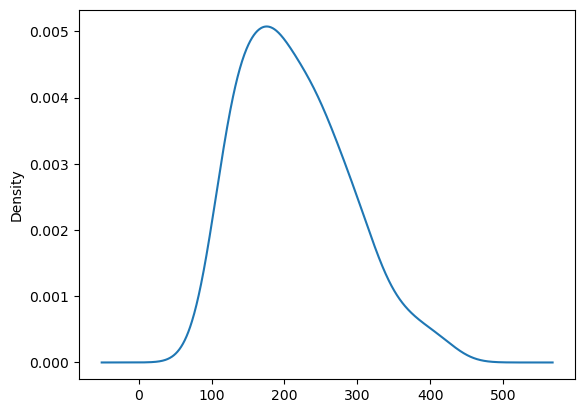

In [7]:
#Density plot and Lag plot
Airlines1.Passengers.plot(kind='kde')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

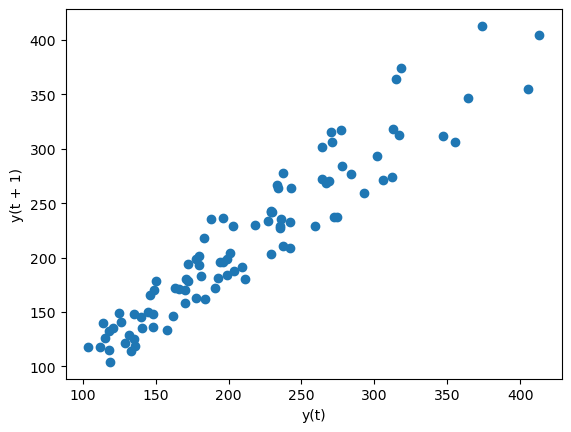

In [8]:
# scatter plot
from pandas.plotting import lag_plot
lag_plot(Airlines1.Passengers)
     

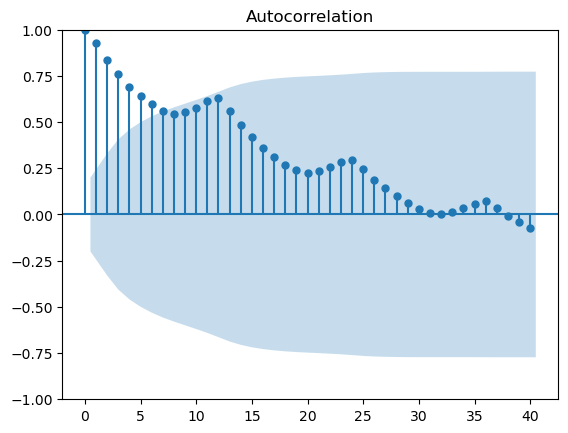

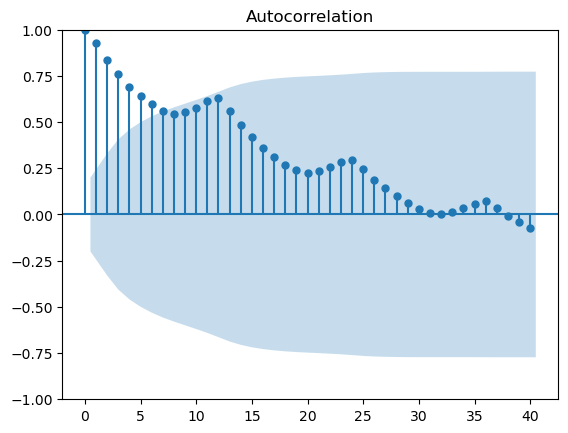

In [9]:
# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(Airlines1.Passengers,lags=40)

<Axes: xlabel='Year', ylabel='Passengers'>

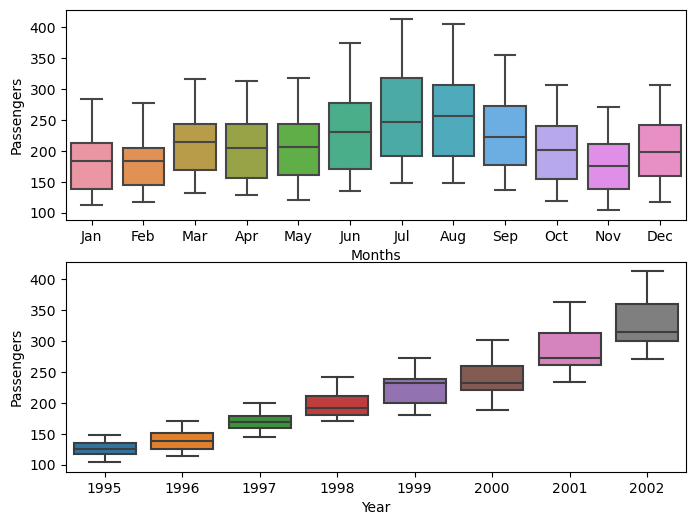

In [10]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Months",y="Passengers",data=Airlines1)

plt.subplot(212)
sns.boxplot(x="Year",y="Passengers",data=Airlines1)

<Axes: xlabel='Months', ylabel='Passengers'>

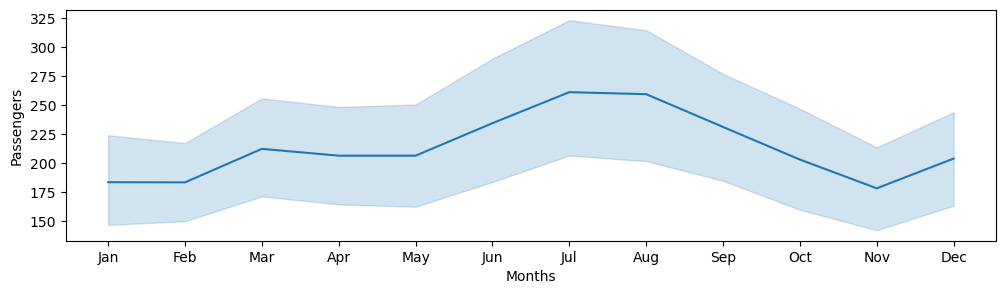

In [12]:
#Line Plot
plt.figure(figsize=(12,3))
sns.lineplot(x="Months",y="Passengers",data=Airlines1)

In [13]:
train=Airlines1.head(int(len(Airlines1.Date)*0.9))
test=Airlines1.tail(len(Airlines1.Date)-len(train.Date))
     

In [14]:
train

,Date,Passengers,Month_Year,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year,t,t_square,Log_Passengers
0,1995-01-01,112,Jan-95,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1995,1,1,4.718499
1,1995-02-01,118,Feb-95,Feb,0,0,0,1,0,0,0,0,0,0,0,0,1995,2,4,4.770685
2,1995-03-01,132,Mar-95,Mar,0,0,0,0,0,0,0,1,0,0,0,0,1995,3,9,4.882802
3,1995-04-01,129,Apr-95,Apr,1,0,0,0,0,0,0,0,0,0,0,0,1995,4,16,4.859812
4,1995-05-01,121,May-95,May,0,0,0,0,0,0,0,0,1,0,0,0,1995,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2001-10-01,274,Oct-01,Oct,0,0,0,0,0,0,0,0,0,0,1,0,2001,82,6724,5.613128
82,2001-11-01,237,Nov-01,Nov,0,0,0,0,0,0,0,0,0,1,0,0,2001,83,6889,5.468060
83,2001-12-01,278,Dec-01,Dec,0,0,1,0,0,0,0,0,0,0,0,0,2001,84,7056,5.627621
84,2002-01-01,284,Jan-02,Jan,0,0,0,0,1,0,0,0,0,0,0,0,2002,85,7225,5.648974


In [15]:
test

,Date,Passengers,Month_Year,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Year,t,t_square,Log_Passengers
86,2002-03-01,317,Mar-02,Mar,0,0,0,0,0,0,0,1,0,0,0,0,2002,87,7569,5.758902
87,2002-04-01,313,Apr-02,Apr,1,0,0,0,0,0,0,0,0,0,0,0,2002,88,7744,5.746203
88,2002-05-01,318,May-02,May,0,0,0,0,0,0,0,0,1,0,0,0,2002,89,7921,5.762051
89,2002-06-01,374,Jun-02,Jun,0,0,0,0,0,0,1,0,0,0,0,0,2002,90,8100,5.924256
90,2002-07-01,413,Jul-02,Jul,0,0,0,0,0,1,0,0,0,0,0,0,2002,91,8281,6.023448
91,2002-08-01,405,Aug-02,Aug,0,1,0,0,0,0,0,0,0,0,0,0,2002,92,8464,6.003887
92,2002-09-01,355,Sep-02,Sep,0,0,0,0,0,0,0,0,0,0,0,1,2002,93,8649,5.872118
93,2002-10-01,306,Oct-02,Oct,0,0,0,0,0,0,0,0,0,0,1,0,2002,94,8836,5.723585
94,2002-11-01,271,Nov-02,Nov,0,0,0,0,0,0,0,0,0,1,0,0,2002,95,9025,5.602119
95,2002-12-01,306,Dec-02,Dec,0,0,1,0,0,0,0,0,0,0,0,0,2002,96,9216,5.723585


In [16]:
#Linear Model
import numpy as np
import statsmodels.formula.api as smf
Linear_model=smf.ols("Passengers~t",data=train).fit()
pred_linear=Linear_model.predict(test["t"])
rmse_linear=np.sqrt(np.mean(test["Passengers"]-np.array(pred_linear))**2)
rmse_linear

36.34856361149116

In [17]:
#Exponential
exp_model=smf.ols("Log_Passengers~t",data=train).fit()
pred_exp_model=exp_model.predict(test["t"])
rmse_exp_model=np.sqrt(np.mean((test["Passengers"])-(np.array(pred_exp_model)))**2)
rmse_exp_model

332.0234293338548

In [18]:
#Quadratic
Quad=smf.ols("Passengers~t+t_square",data=train).fit()
pred_Quad=Quad.predict(test[["t","t_square"]])
rmse_Quad=np.sqrt(np.mean((test["Passengers"])-(np.array(pred_Quad)))**2)
rmse_Quad

27.186702876821776

In [19]:
#Additive seasonality
Add_sea=smf.ols("Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train).fit()
pred_add_sea=Add_sea.predict(test[["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]])
rmse_add_sea=np.sqrt(np.mean(test["Passengers"]-(np.array(pred_add_sea)))**2)
rmse_add_sea

134.92857142857127

In [20]:
#Additive Seasonality Quadratic
add_sea_quad=smf.ols("Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train).fit()
pred_add_sea_quad=add_sea_quad.predict(test[["t","t_square","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]])
rmse_add_sea_quad=np.sqrt(np.mean(test["Passengers"]-np.array((pred_add_sea_quad)))**2)
rmse_add_sea_quad

17.867248407443206

In [21]:
# Multiplicative Seasonality
mul_sea=smf.ols("Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train).fit()
pred_Mult_sea=mul_sea.predict(test[["Log_Passengers","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]])
rmse_Mult_sea=np.sqrt(np.mean(test["Passengers"]-(np.array(np.exp(pred_Mult_sea))))**2)
rmse_Mult_sea

142.41437402901573

In [22]:
#Multiplicative Additive Seasonality
mul_add_sea=smf.ols("Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec",data=train).fit()
pred_mul_add_sea=mul_add_sea.predict(test)
rmse_mul_add_sea=np.sqrt(np.mean(test["Passengers"]-(np.array(pred_mul_add_sea)))**2)
rmse_mul_add_sea
     

331.9942873024951

In [23]:
#Compare the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp_model","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_mul_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp_model,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_mul_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,17.867248
2,rmse_Quad,27.186703
0,rmse_linear,36.348564
3,rmse_add_sea,134.928571
5,rmse_Mult_sea,142.414374
6,rmse_mul_add_sea,331.994287
1,rmse_exp_model,332.023429


Model "Additive Seasonality Quadratic" is best for the Forecasting